In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set()

## Parameter Values and Initial Conditions

In [3]:
l = 0.31 #Production rate for non-infected cancer cells
A = 3e9  #Carrying capacity
k = 3500 #Production rate of new viruses
r = 8.9e-13 #Infection rate of non-infected cancer cells
m = 0.02  #Death rate of non-infected cancer cells
v = 2.3 #Death rate of viruses
u = 1 #Death rate of infected cancer rates

In [4]:
C0 = 100e6 #Non-infected cancer cells
I0 = 0 #Infected cancer cells
V0 = 2.5e9 #Viruses

x0 = [C0, I0, V0] #Initial conditions

t_end = 2000 #Simulation time

## Asymptotically Stable Equilibria

In [5]:
if l < m:
    E = [0, 0, 0]
    print("E3  exponentially asymptotically stable")
elif u*v > r*k*A*(1-m/l):
    C4 = A*(1-m/l)
    E = [C4, 0, 0]
    print("E4 exponentially asymptotically stable")
else:
    C5 = u*v/(r*k)
    I5 = v/(r*k) * (l - l*u*v/(A*r*k) - m)
    V5 = 1/r * (l - l*u*v/(A*r*k) - m)
    E = [C5, I5, V5]
    print("E5 exponentially asymptotically stable")

E5 exponentially asymptotically stable


## ODE System

In [6]:
def Logistic_Model(t, x): #This function returns [C', I', V']
    C, I, V = x #Here x is a vector such that C=x[0], I=x[1], V=x[2]

    dC = l*C*(1-C/A) - r*V*C - m*C
    dI = r*V*C - u*I
    dV = k*I - v*V
    
    return [dC, dI, dV]

## Solution

In [7]:
solution_logistic = solve_ivp(Logistic_Model, t_span = (0, t_end), y0 = x0, method="BDF", rtol=1e-10, atol=1e-12, t_eval=np.linspace(0, t_end, t_end))

## Plots

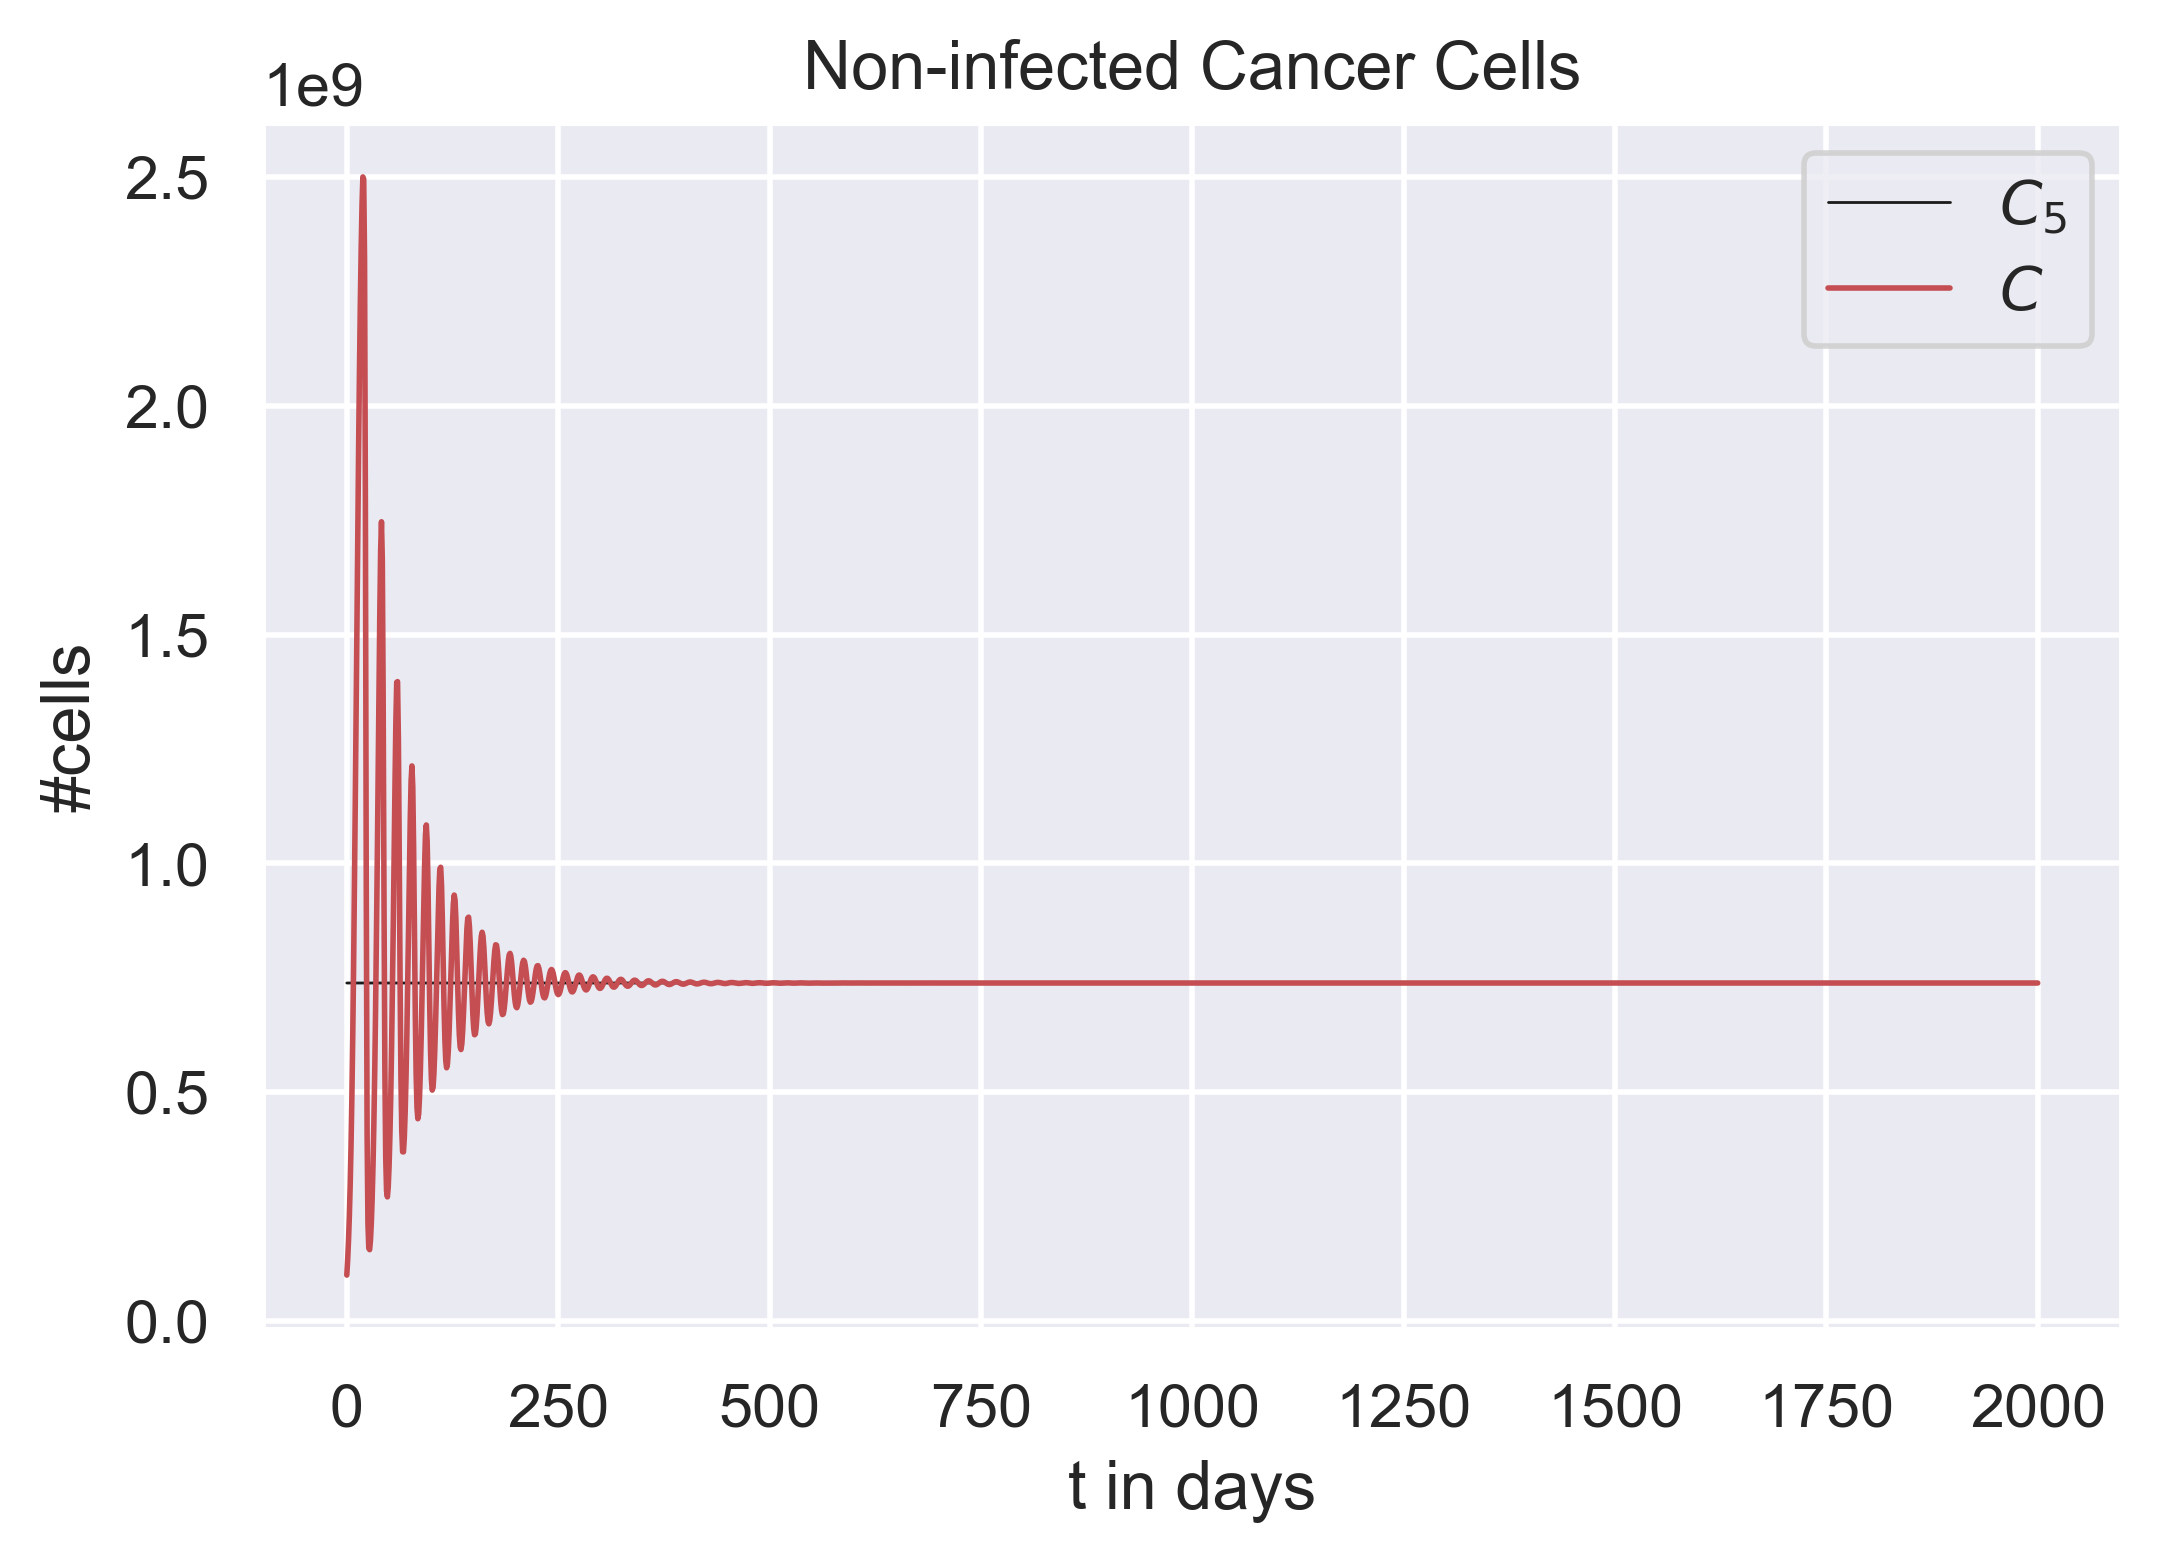

In [8]:
#Npn-infected cancer cells

fig = plt.figure(dpi=400)

plt.plot(solution_logistic.t, E[0]*np.ones_like(solution_logistic.t), 'k-', linewidth=0.5) #Equilibrium
plt.plot(solution_logistic.t, solution_logistic.y[0], 'r-', linewidth=1.0) #Solution non-infected cancer cells

plt.xlabel("t in days")
plt.ylabel("#cells")
plt.title("Non-infected Cancer Cells")
plt.legend(["$C_5$", "$C$"])

plt.show()

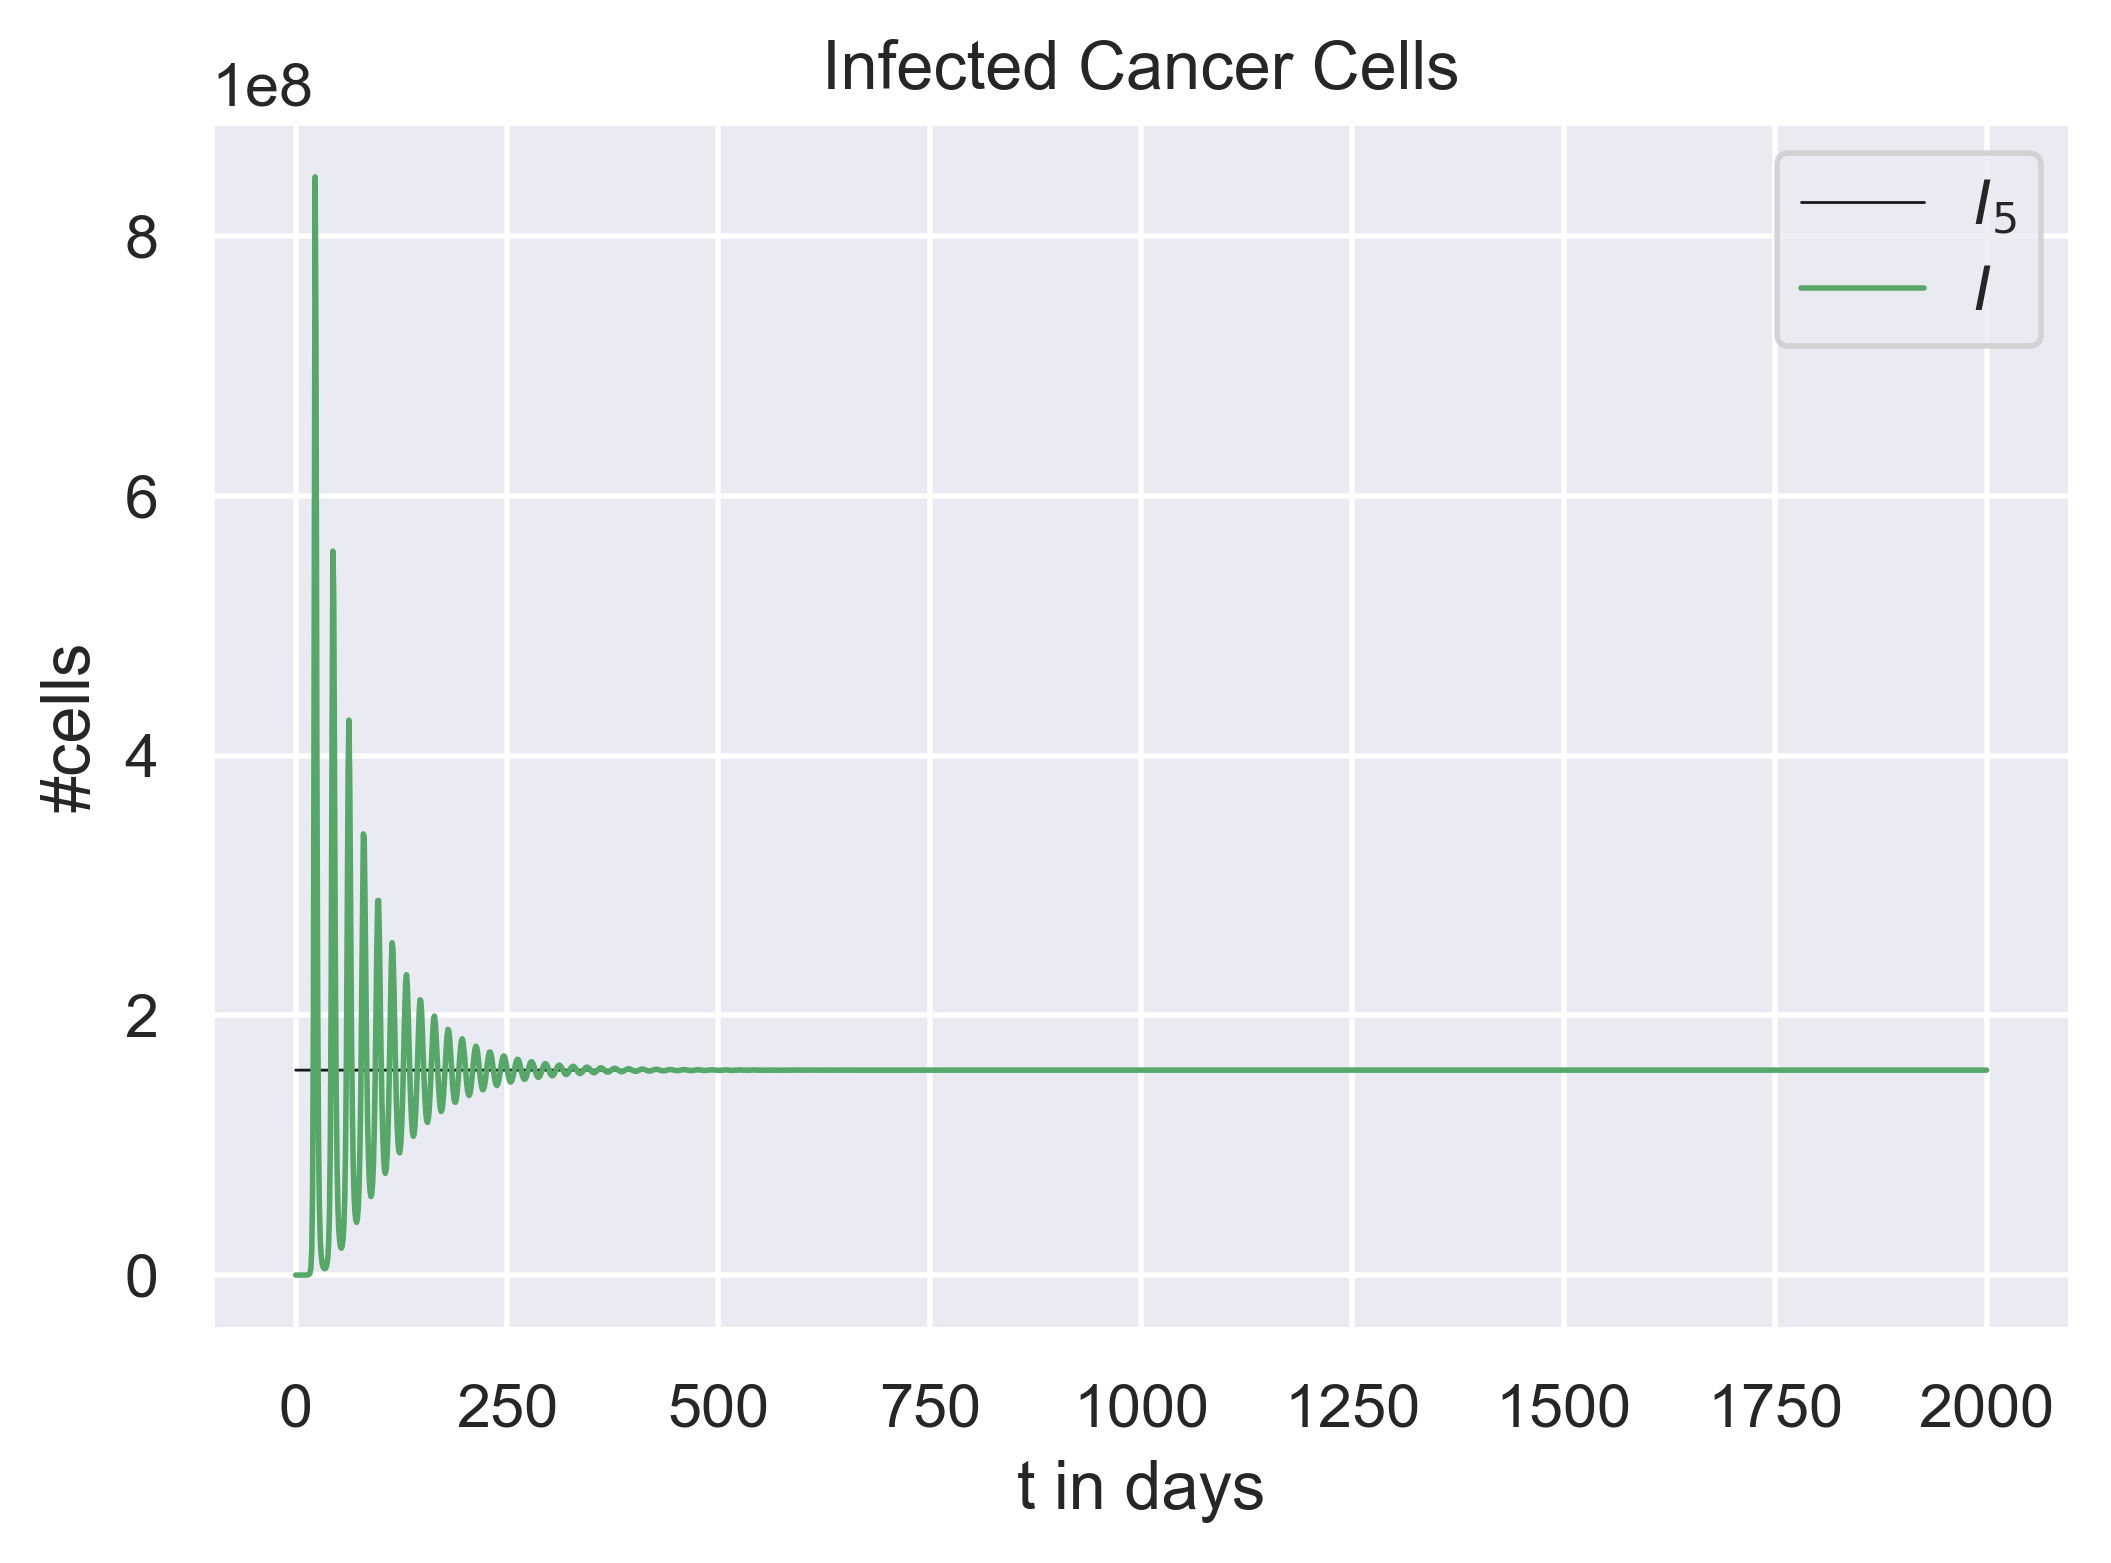

In [9]:
#Infected cancer cells

fig = plt.figure(dpi=400)

plt.plot(solution_logistic.t, E[1]*np.ones_like(solution_logistic.t), 'k-', linewidth=0.5) #Equilibrium
plt.plot(solution_logistic.t, solution_logistic.y[1], 'g-', linewidth=1.0) #Solution infected cancer cells

plt.xlabel("t in days")
plt.ylabel("#cells")
plt.title("Infected Cancer Cells")
plt.legend(["$I_5$", "$I$"])

plt.show()

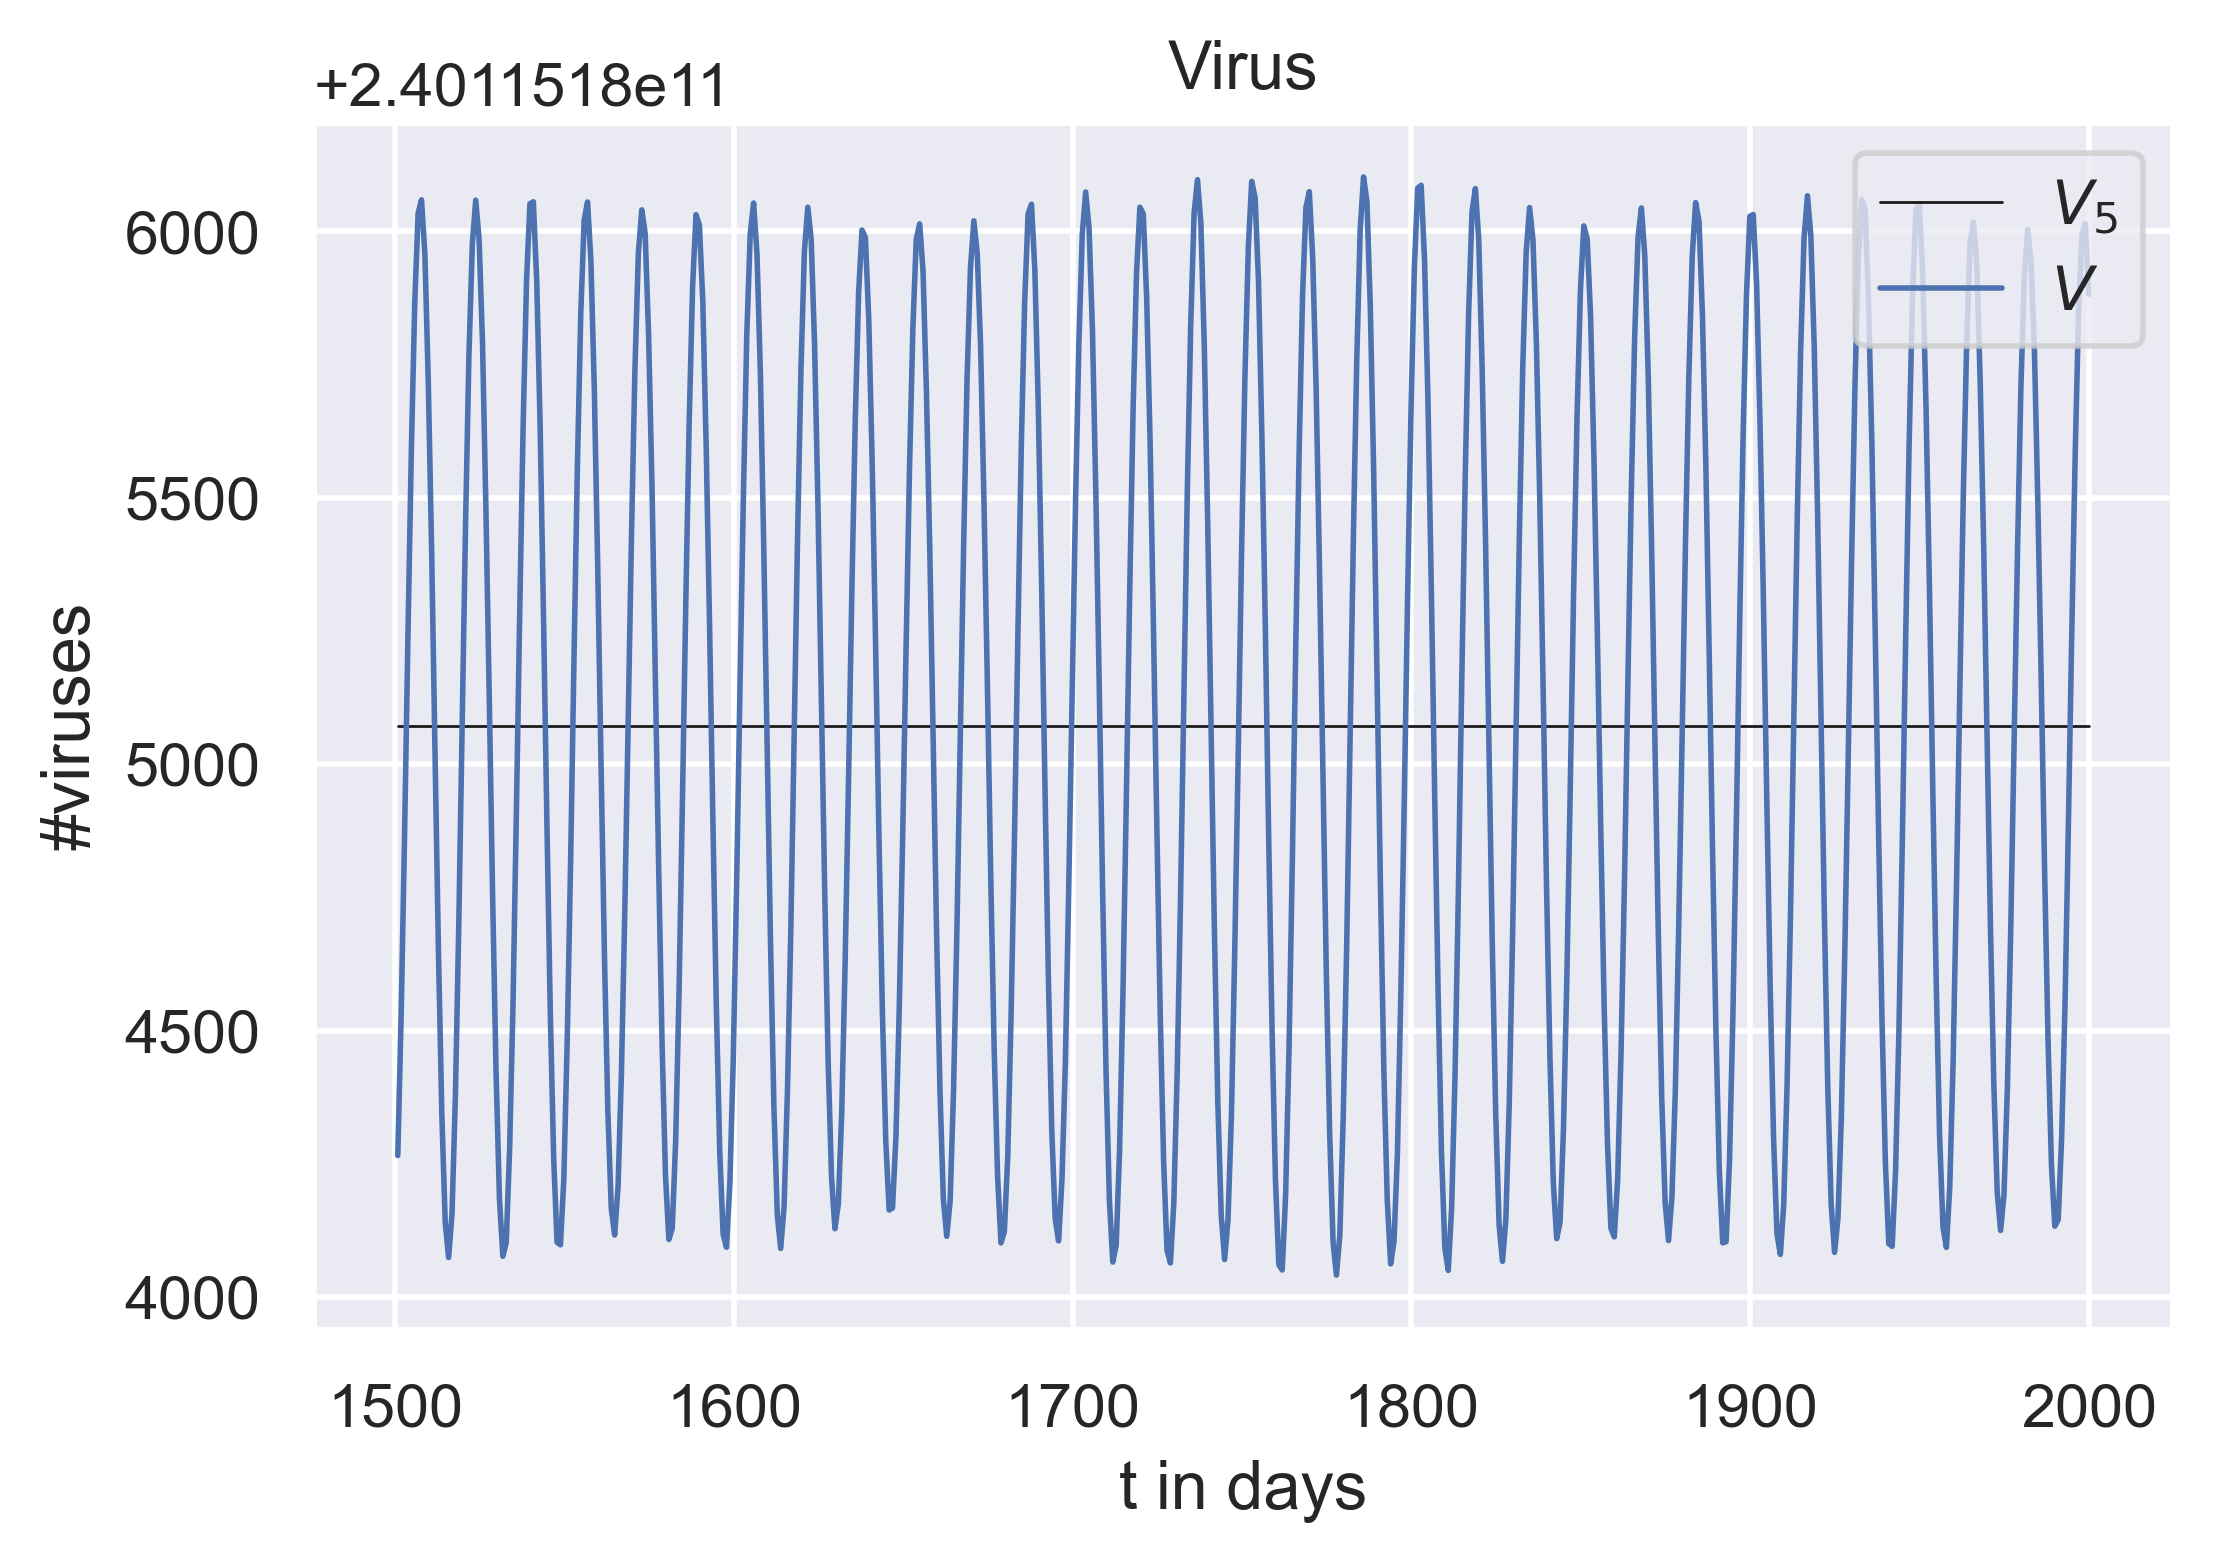

In [16]:
#Viruses

fig = plt.figure(dpi=400)

plt.plot(solution_logistic.t, E[2]*np.ones_like(solution_logistic.t), 'k-', linewidth=0.5) #Equilibrium
plt.plot(solution_logistic.t, solution_logistic.y[2], 'b-', linewidth=1.0) #Solution viruses

plt.xlabel("t in days")
plt.ylabel("#viruses")
plt.title("Virus")
plt.legend(["$V_5$", "$V$"], loc="upper right")

plt.show()